In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.isotonic import IsotonicRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from scipy.ndimage.filters import gaussian_filter

from app.models import ExperimentResult

In [157]:
# targetid = range(932, 943)
targetid = range(954, 958)
targetid = [954]

In [158]:
qs = ExperimentResult.objects.filter(pk__in=targetid).all()

In [159]:
inst = ExperimentResult.objects.get(pk=925)
len(inst.get_i())

800

In [160]:
def inner(inst):
    i = inst.get_i()
    v = inst.get_v()
    df = pd.DataFrame.from_dict({'i': i, 'v': v})
#     df=df[df.i<70]
#     df=df[df.v<700]
#     X = df.v.values.reshape([df.v.shape[0], 1])
#     #X = df.v.values.reshape([df.v.shape[0], 1])
#     Y = df.i
#     n = 1000
#     # model = IsotonicRegression().fit(X, Y)
#     model = make_pipeline(\
#                 PolynomialFeatures(5), 
#                 RandomForestRegressor(n_estimators=100, min_samples_split=10)\
#             ).fit(X, Y)
#     X_ = np.linspace(df.v.min(), df.v.max(), n)
#     mdf = pd.DataFrame.from_dict({'v':X_, 'i':model.predict(X_.reshape(-1, 1))})
# #     mdf.i = gaussian_filter(mdf.i, sigma=20)
#     mdf = mdf.round(2)
#     mdf.v = (mdf.v/4095)*5.0 
#     mdf.i = ((mdf.i/4095)*5.0)/(33*10^5)
#     mdf.v = round(mdf.v,2)

    mdf = df.groupby(['v'], as_index=False).mean()
    return mdf

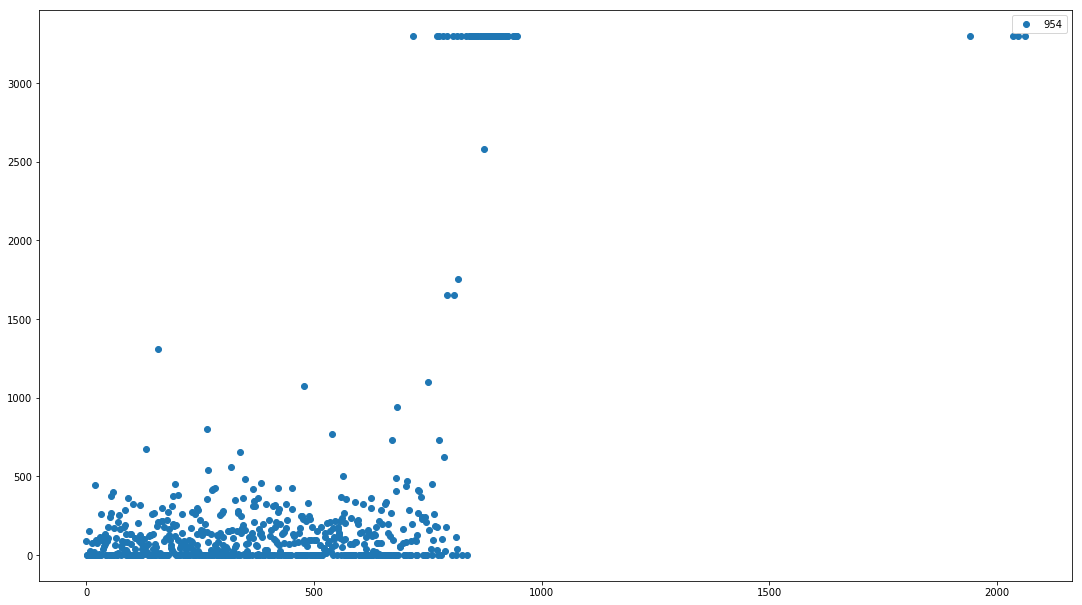

In [161]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
lgds = list()
colors = 'rgboky'
nc = len(colors)
for i, inst in enumerate(qs):
    df = inner(inst)
    x_ = df.v
    y_ = df.i
#     c = colors[i%nc]
#     patch = mpatches.Patch(label=inst.id, color=)
#     lgds.append( patch )
#     ax.plot(x_, y_, 'C{}'.format(i%9), label=inst.id)
    ax.scatter(x_, y_, label=inst.id)
ax.legend()
